# Part 4 - Build Machine Learning Model
Eric Kwok

This notebook is based on [Bioinformatics Project - Computational Drug Discovery [Part 4] Comparing Classifiers for Building Classification Models](https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb) by Chanin Nantasenamat.

In this part, we will build a regression model of influenza A inhibitors using the random forest algorithm.

---

## Import libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load data set

In [3]:
df = pd.read_csv('influenza_a_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.397940
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.124939
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1587,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.392545
1588,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1589,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.173925


## Specify input and output
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### Input features

In [4]:
X = df.drop(columns=['pIC50'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1587,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1588,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1589,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output variable

In [5]:
Y = df.pIC50
Y

0       2.397940
1       2.000000
2       3.124939
3       3.000000
4       2.301030
          ...   
1586    4.000000
1587    4.392545
1588    4.000000
1589    5.173925
1590    4.477556
Name: pIC50, Length: 1591, dtype: float64

### Examine data dimensions

In [6]:
X.shape

(1591, 881)

In [7]:
Y.shape

(1591,)

### Remove low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(1591, 173)

## Data split (80/20 ratio)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((1272, 173), (1272,))

In [13]:
X_test.shape, Y_test.shape

((319, 173), (319,))

## Building a Regression Model using Random Forest

In [27]:
import numpy as np

np.random.seed(0)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)  # Coefficient of determination R^2 of prediction
r2

0.5079816810314849

In [16]:
Y_pred = model.predict(X_test)

## Scatter Plot of Experimental vs. Predicted pIC50 Values

/Users/erickwok/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

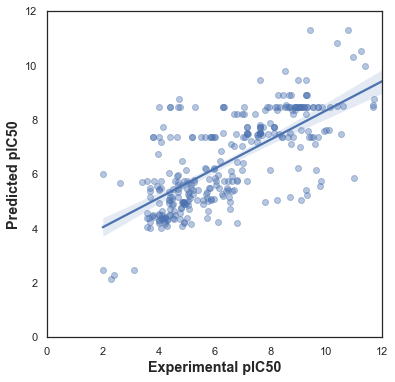

In [28]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style('white')

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(6, 6)
plt.show